In [8]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

sarco =  False
fatigue = False

if sarco:
    name = '2024_02_17_18_56_59'
    env_name = 'myoSarcLegReachFixed-v3'
elif fatigue:
    name = '2024_02_20_15_03_01'
    env_name = 'myoFatiLegReachFixed-v4'
else:
    name = '2024_02_17_20_19_05'
    env_name = 'myoLegReachFixed-v2'
steps = 1000
pkl_path = './output/PKL/' + env_name + '/'
ep = 200


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [ 10, 20, 30, 40, 50, 60]

In [9]:
stand = []
fall = []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())

(0.01, 100)

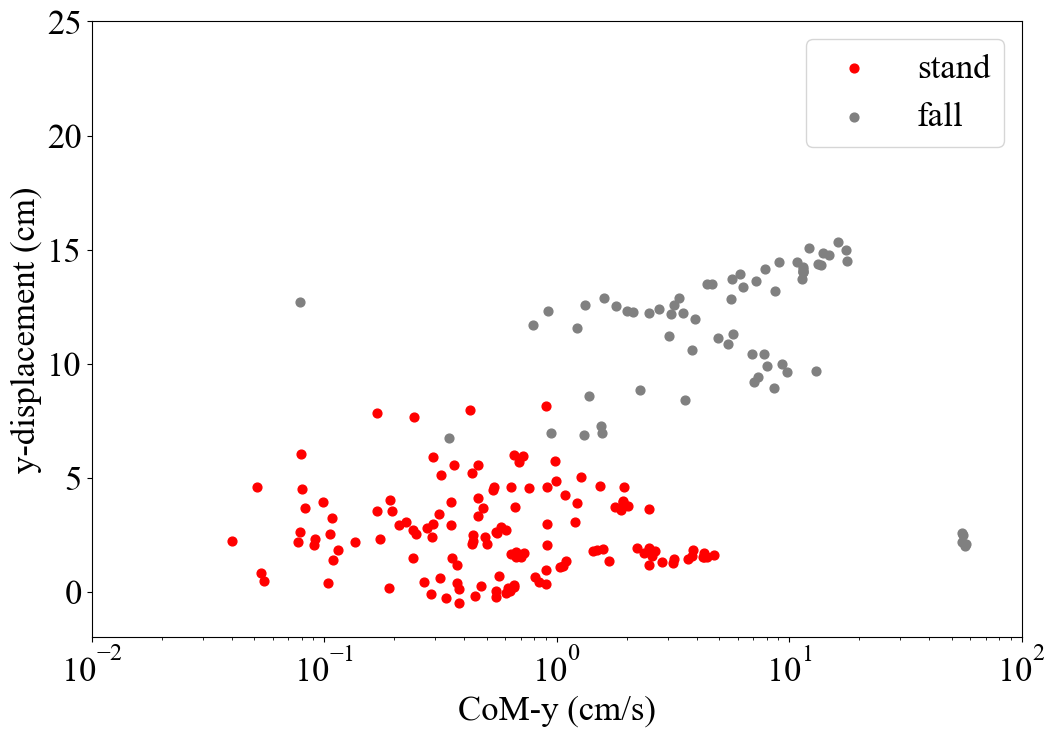

In [10]:
max_y_pos_stand = []
max_y_vel_stand = []
max_y_pos_fall = []
max_y_vel_fall = []
for data in stand:
    y = np.abs([arr[1] for arr in data["bodyInfo"]["com"][100:]])
    max_y_pos_stand.append(max(y)*100 - 8)
    index = np.argmax(y)
    y_v = np.abs([arr[1] for arr in data["bodyInfo"]["com_v"][100:]])
    max_y_vel_stand.append(y_v[index]*100)

for m in fall:
    z = np.abs(np.array([arr[2] for arr in m["bodyInfo"]["com_v"][100:]]))
    max_z = np.argmax(np.abs(z) >= 0.1)
    y = np.abs([arr[1] for arr in m["bodyInfo"]["com"][100:100+max_z]])
    max_y_pos_fall.append(max(y)*100 - 8)
    index = np.argmax(y)
    y_v = np.abs([arr[1] for arr in m["bodyInfo"]["com_v"][100:]])
    max_y_vel_fall.append(y_v[index]*100)


plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":25}) 


fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))
plt.scatter(max_y_vel_stand, max_y_pos_stand, label = 'stand', s= 40, color = 'red')
plt.scatter(max_y_vel_fall, max_y_pos_fall, label = 'fall', s = 40, color = 'grey')
plt.xscale('log')
plt.legend()
plt.ylabel('y-displacement (cm)')
plt.xlabel('CoM-y (cm/s)')
plt.ylim([-2, 25])
plt.xlim([10**(-2), 10**2])